# HR Analytics

This is a quick exploratory data analysis of the following HR Analytics data set: https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction/data.

## Exploratory Data Analysis 

### Reading in Data and Descriptive Stats

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [102]:
df = pd.read_csv('hr.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [103]:
df.shape

(1470, 35)

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [105]:
df.isnull().sum().sum()

0

There are no null values, which is good.

Let's take a look at how many unique values there are in each feature.

In [106]:
nunique = df.apply(lambda x: x.nunique())
unique_values = df.apply(lambda x: x.unique())
data = pd.DataFrame({'unique': nunique, 'unique_values': unique_values})
data

,unique,unique_values
Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
Attrition,2,"[Yes, No]"
BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
Department,3,"[Sales, Research & Development, Human Resources]"
DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
Education,5,"[2, 1, 4, 3, 5]"
EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
EmployeeCount,1,[1]
EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


Since Over18, EmployeeCount, StandardHours, and PerformanceRating are relatively narrow in the unique values they hold (either 1 or 2, not very informative), we can remove them. 

We'll also remove EmployeeNumber because it's just not important for this analysis to keep track of individual employees.

In [107]:
df.drop(['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'PerformanceRating'],
        axis = 1, inplace=True)

### Outliers

Let's take a look at a box plot to get an idea of outliers.

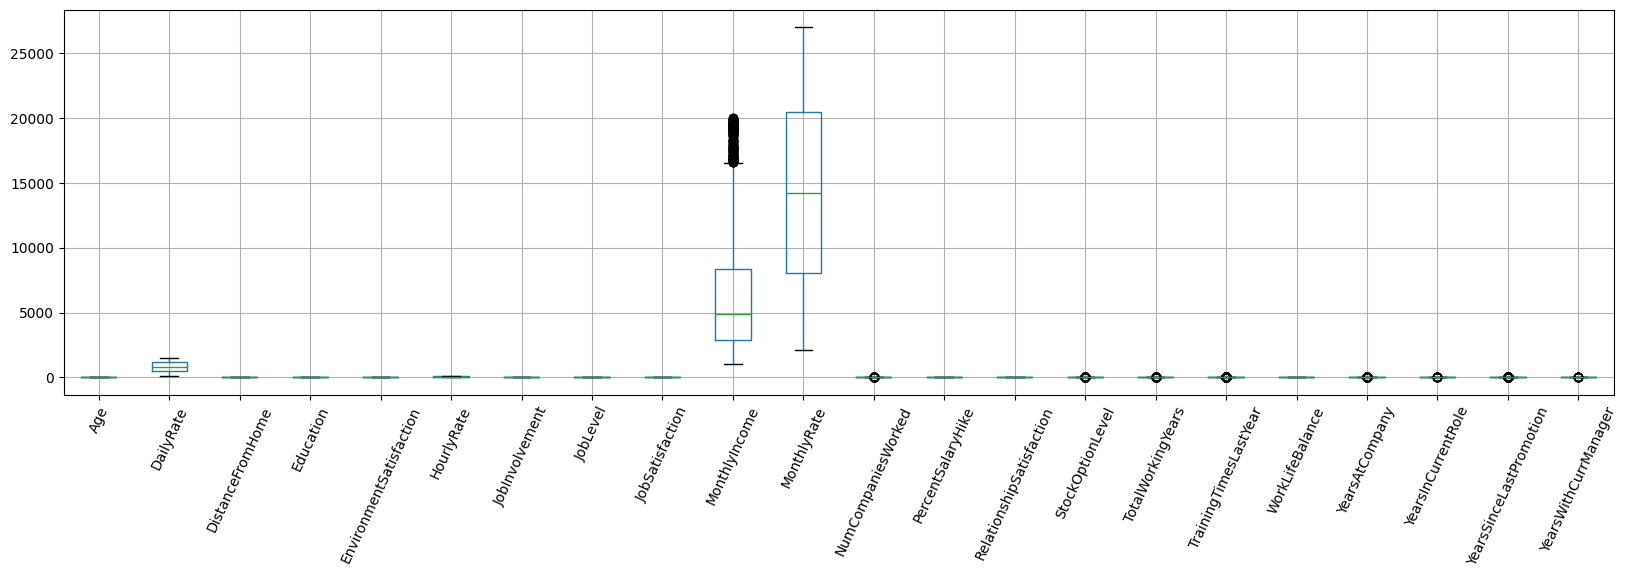

In [108]:
df.boxplot(figsize=(20,5))
plt.xticks(rotation=65)
plt.show()

Clearly Monthly Income has a signficiant number of outliers, so we can remove those.

In [109]:
quantile1 = df['MonthlyIncome'].quantile(0.25)
quantile3 = df['MonthlyIncome'].quantile(0.75)
IQR = quantile3 - quantile1
lower_bound = quantile1 - 1.5*IQR
upper_bound = quantile3 + 1.5*IQR

newdf = df[(df['MonthlyIncome'] >= lower_bound) & (df['MonthlyIncome'] <= upper_bound)]

In [110]:
newdf.shape

(1356, 30)

Let's take a look at the boxplot without the monetary values, because the domain of that feature is making it difficult to see other outliers.

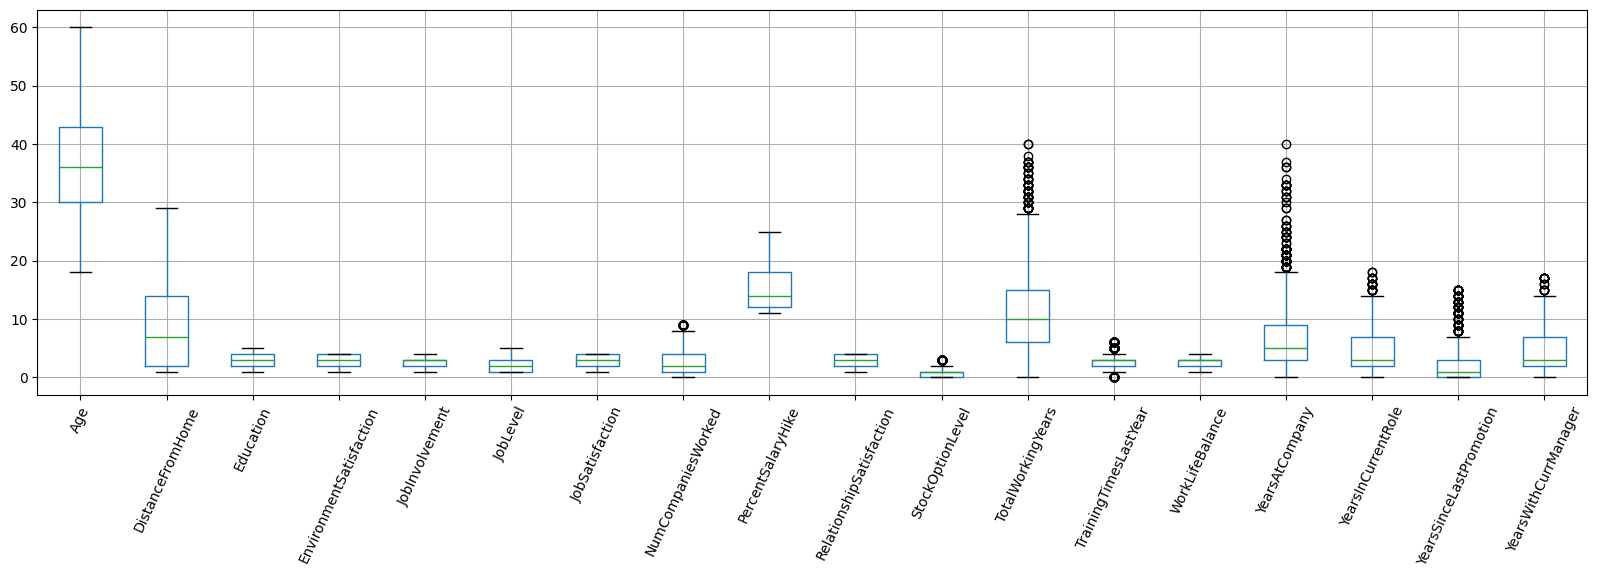

In [111]:
df.drop(['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'HourlyRate'], axis=1).boxplot(figsize=(20,5))
plt.xticks(rotation=65)
plt.show()

Tentatively, let's not remove the outliers and see how the analysis goes.

Let's also refactor the Attrition column to be 1/0 rather than True/False.

In [112]:
newdf['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

/tmp/ipykernel_65638/3138387519.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Correlations

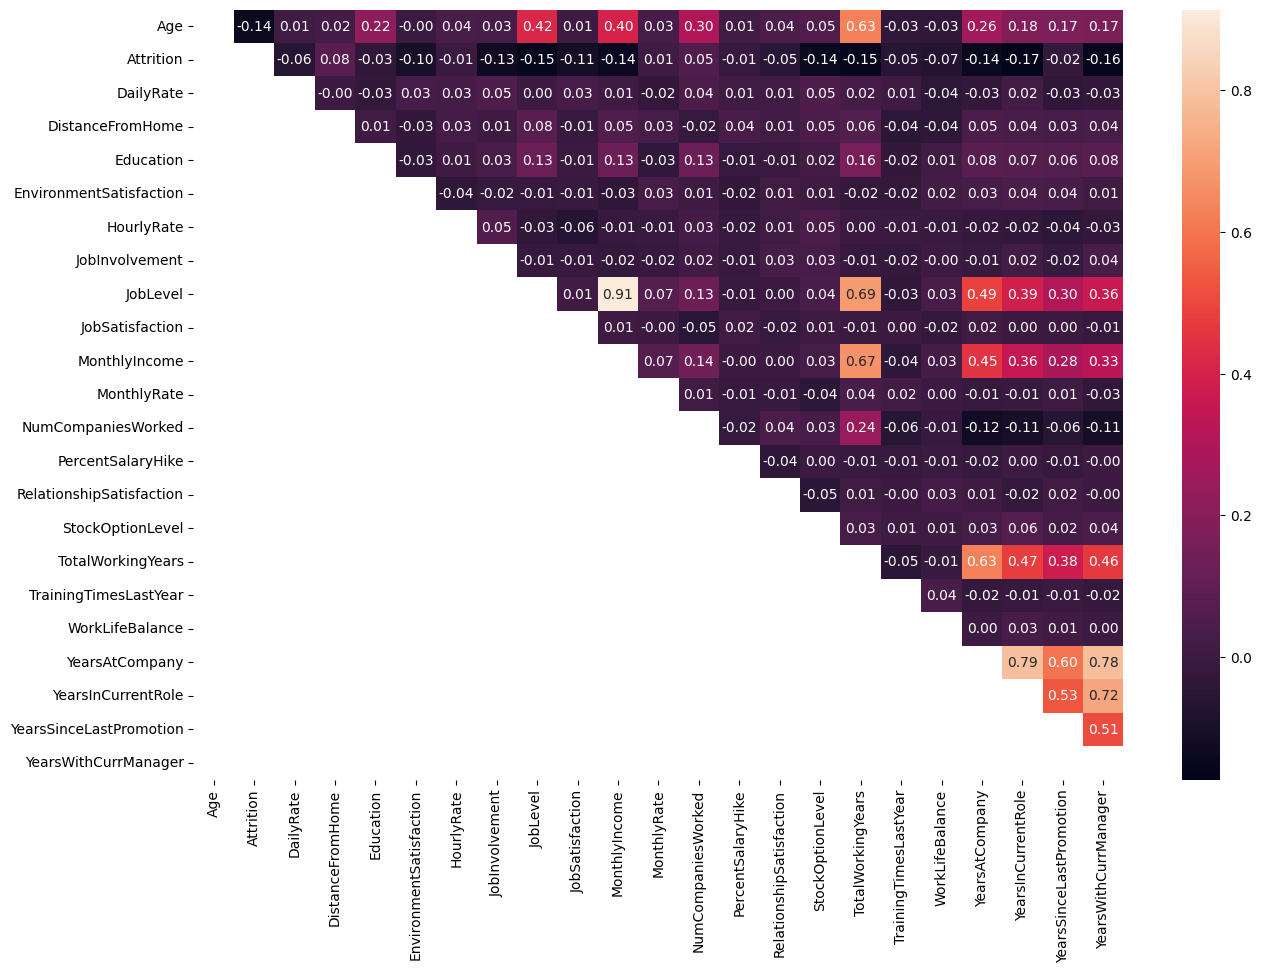

In [113]:
corr = newdf.corr(numeric_only=True)
matrix = np.tril(corr)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, mask=matrix, fmt='.2f')
plt.show()

Unfortunately, there's no one factor that stands out that correlates well with attrition. This means we'll have to do some other explorations.

Let's look at only correlations with an absolute value above 0.25.

In [114]:
threshold = 0.25 

high_corr_pairs = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if i != j and abs(corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr.index[i], corr.columns[j], corr.iloc[i, j]))

high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable 1', 'Variable 2', 'Correlation'])

print(high_corr_df)

                 Variable 1               Variable 2  Correlation
0                       Age                 JobLevel     0.419030
1                       Age            MonthlyIncome     0.401033
2                       Age       NumCompaniesWorked     0.295647
3                       Age        TotalWorkingYears     0.625279
4                       Age           YearsAtCompany     0.262371
5                  JobLevel            MonthlyIncome     0.913238
6                  JobLevel        TotalWorkingYears     0.691285
7                  JobLevel           YearsAtCompany     0.486933
8                  JobLevel       YearsInCurrentRole     0.389653
9                  JobLevel  YearsSinceLastPromotion     0.303465
10                 JobLevel     YearsWithCurrManager     0.362996
11            MonthlyIncome        TotalWorkingYears     0.667590
12            MonthlyIncome           YearsAtCompany     0.450460
13            MonthlyIncome       YearsInCurrentRole     0.356417
14        

Let's look at a smaller heatmap with just these features.

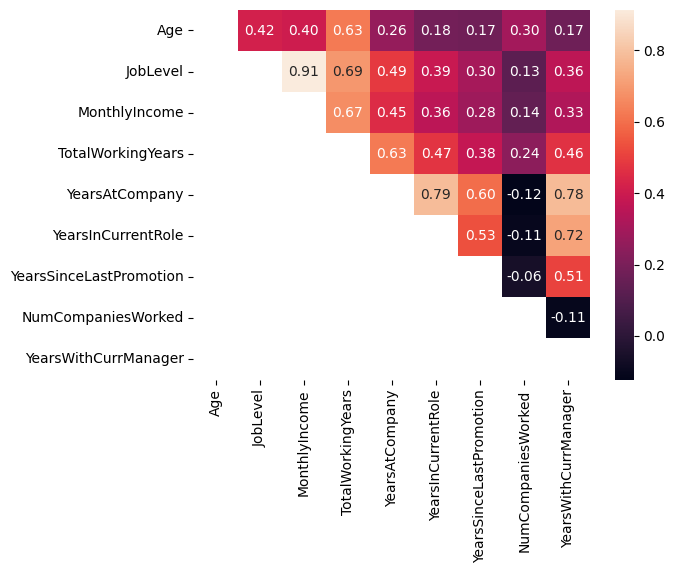

In [115]:
unique = (pd.concat([high_corr_df['Variable 1'], high_corr_df['Variable 2']])).unique()

corr2 = newdf[unique].corr(numeric_only=True)
matrix2 = np.tril(corr2)

sns.heatmap(corr2, annot=True, fmt='.2f', mask=matrix2)
plt.show()

Priliminary, these seem like important factors to consider.

### Attrition and Age

In [116]:

newdf['Attrition'] = newdf['Attrition'].map({1: 'Yes', 0: 'No'})

fig = px.histogram(newdf,
                  x="Age",
                  color="Attrition",
                  title="Age Distribution By Attrition",
                  
                  template="plotly",
                  marginal="box"
)

fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Density",
    legend_title="Attrition",
    showlegend=True,
    plot_bgcolor="white",
    width=800,
    height=500
)

fig.show()

/tmp/ipykernel_65638/2128756563.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Young people are more likely to leave their jobs.

### Attrition and Job Role

In [117]:
fig = px.histogram(newdf,
                  x="JobRole",
                  color="Attrition",
                  title="Attrition by Job Title",
                  template="plotly",
                  barmode="stack"
)

fig.update_layout(
    xaxis_title="Job Roles",
    yaxis_title="Number of Employees",
    legend_title="Attrition",
    showlegend=True,
    plot_bgcolor="white",
    width=800,
    height=500
)

fig.show()

In [118]:

fig = px.histogram(newdf,
                  x="JobRole",
                  color="Attrition",
                  title="Attrition by Job Title",
                  template="plotly",
                  barmode="stack",
                  barnorm='percent'
)

fig.update_layout(
    xaxis_title="Job Roles",
    yaxis_title="Number of Employees",
    legend_title="Attrition",
    showlegend=True,
    plot_bgcolor="white",    
    width=800,
    height=500
)

fig.show()

Sales Representatives leave their jobs ~40% of the time, and Research Directors never do. 

### Attrition and Job Satisfaction

In [119]:

fig = px.histogram(newdf,
                  x="JobSatisfaction",
                  color="Attrition",
                  title="Attrition by Job Satisfaction",
                  template="plotly",
                  barmode="stack",
)

fig.update_layout(
    xaxis_title="Job Satisfaction",
    yaxis_title="Employees",
    legend_title="Attrition",
    showlegend=True,
    plot_bgcolor="white",
    bargap=0.2, 
    width=800,
    height=500
)

fig.show()

In [120]:
fig = px.histogram(newdf,
                  x="JobSatisfaction",
                  color="Attrition",
                  title="Attrition by Job Satisfaction",
                  template="plotly",
                  barmode="stack",
                  barnorm='percent'
)

fig.update_layout(
    xaxis_title="Job Satisfaction",
    yaxis_title="Employees",
    legend_title="Attrition",
    showlegend=True,
    plot_bgcolor="white",
    bargap=0.2,
    width=800,
    height=500
)

fig.show()

Interestingly, Job Satisfaction rating is unlikely to predict attrition.

### Monthly Income

In [121]:
fig1 = px.histogram(newdf,
                  x="MonthlyIncome",
                  color="Attrition",
                  title="Attrition by Monthly Income",
                  template="plotly",
                  barmode="stack",
)

fig1.update_layout(
    xaxis_title="Monthly Income",
    yaxis_title="Number of Employees",
    legend_title="Attrition",
    showlegend=True,
    plot_bgcolor="white",
    bargap=0.2,
    width=800,
    height=500
)

fig1.show()

In [122]:
fig2 = px.histogram(newdf,
                  x="MonthlyIncome",
                  color="Attrition",
                  title="Attrition by Monthly Income",
                  template="plotly",
                  barmode="stack",
                  barnorm='percent'
)

fig2.update_layout(
    xaxis_title="Monthly Income",
    yaxis_title="Number of Employees",
    legend_title="Attrition",
    showlegend=True,
    plot_bgcolor="white",
    bargap=0.2,
    width=800,
    height=500
)

fig2.show()

It looks like the lower end of the monthly income spectrum is more likely to leave their jobs.

# Logistic Regression 

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

First, we have some non-numerical values that we need to make numerical using dummies.

In [124]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df2 = pd.get_dummies(df)

df2.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,True,False,False,False,True,False,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,True,False,False,False,True,False,True,False
2,37,1,1373,2,2,4,92,2,1,3,...,False,False,False,False,False,False,False,True,False,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,True,False,False,False,True,False,False,True
4,27,0,591,2,1,1,40,3,1,2,...,False,False,False,False,False,False,True,False,True,False


In [125]:
df2.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       '

In [126]:
attrition = df2['Attrition']
df2 = df2.drop('Attrition', axis=1)

In [127]:
scaler = StandardScaler()
scaler.fit(df2)
df3 = pd.DataFrame(scaler.transform(df2), columns=df2.columns)

df3.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650,-1.591746,1.591746
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,-1.591746,1.591746
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565,0.628241,-0.628241


Let's make a priliminary model to see if the accuracy is acceptable.

In [128]:
X = df3
y = attrition 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [129]:
model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8454810495626822

Next, take a look at what features have the highest absolute value coefficients. We take the absolute value because both negative and positive coefficients contribute to the shape of the model. 

In [130]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})

coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
sorted_coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

sorted_coefficients.head(10)

,Feature,Coefficient,Abs_Coefficient
20,YearsSinceLastPromotion,0.940841,0.940841
21,YearsWithCurrManager,-0.871661,0.871661
22,BusinessTravel_Non-Travel,-0.732426,0.732426
9,MonthlyIncome,-0.728513,0.728513
4,EnvironmentSatisfaction,-0.598013,0.598013
11,NumCompaniesWorked,0.583923,0.583923
7,JobLevel,0.506963,0.506963
49,OverTime_Yes,0.494080,0.494080
48,OverTime_No,-0.494080,0.494080
30,EducationField_Marketing,0.474108,0.474108


If we run the above multiple times, we see differences in what features contribute highly to the model and which do not. In order to smooth out some of those differences, we'll run the model 100 times to see what features bubble up to the top.

In [131]:
def run_model(data, labels):
  X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.7)
  model = LogisticRegression()
  model.fit(X_train, y_train)
  
  coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
  coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
  
  pred = model.predict(X_test)
  
  return (coefficients, accuracy_score(y_test, pred))

all_results = pd.DataFrame()
accuracy_lst = []

for _ in range(100):
  (result, accuracy) = run_model(df3, attrition)
  all_results = pd.concat([all_results, result])
  accuracy_lst.append(accuracy)
  
accuracy_mean = np.mean(accuracy_lst)
print(f'Accuracy over 100 Models: {accuracy_mean}\n')
  
mean_ranks = all_results.groupby('Feature').mean().sort_values(by='Abs_Coefficient', ascending=False)

print('Top 20 Most Important Features\n')
print(mean_ranks[:21])

Accuracy over 100 Models: 0.8620408163265306

Top 20 Most Important Features

                                   Coefficient  Abs_Coefficient
Feature                                                        
YearsSinceLastPromotion               0.568658         0.572012
YearsInCurrentRole                   -0.515371         0.526124
YearsAtCompany                        0.434332         0.506183
NumCompaniesWorked                    0.500475         0.500486
EnvironmentSatisfaction              -0.484462         0.484462
OverTime_Yes                          0.483756         0.483756
OverTime_No                          -0.483756         0.483756
JobRole_Research Director            -0.467905         0.476931
TotalWorkingYears                    -0.449377         0.463516
JobSatisfaction                      -0.455318         0.455318
YearsWithCurrManager                 -0.407213         0.421735
JobInvolvement                       -0.407389         0.407389
DistanceFromHome          

The overall accuracy is relatively high (0.86). 

Positive Correlation (More likely to leave job)
- High number of years since last promotion 
- High number of years at company 
- High number of previous companies worked
- Overtime
- Large distance from home
- High Business Travel 

Negative Correlation (Less likely to leave job)
- High number of years in current role
- Higher environment satisfaction
- High job satisfaction
- High number of years with current manager
- Job title of Research Director
- High number of total working years
- High level of job involvement
- No Business Travel 
- Higher Age

Note that some of the absolute values and coefficients do not match up. This means that on some runs, the coefficient was negative and on others, the coefficient was positive. If the difference between the absolute value and coefficient value are too different, it is difficult to make too many assumptions about these features.